# ***Fake News Analysis***

### MATH475 Final Project

Authors:
- Preston Knepper
- Zachary Eanes
- Kevin McCall

__Link to Dataset:__ https://www.kaggle.com/datasets/saurabhshahane/fake-news-classification

This was completed with minimal AI assistance.

## ***Part I: Data Exploration and Preprocessing***
Due: 11/24/2024


## **Exploratory Data Analysis**

In this section of the assignment, we begin by exploring our fake news dataset. This includes many parts, such as removing unnecessary columns, checking for missing values, visualizing the data, and attempting to find general trends and correlations in our data.

First, we begin by looking at the basic information our dataset contains. 

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# save the dataset into a variable
df = pd.read_csv("WELFake_Dataset.csv")

In [2]:
# display initial information about the dataset
print("==== HEAD ====\n", df.head(10), "\n")
print("==== SAMPLE ====\n", df.sample(10), "\n")
print(df.info())

==== HEAD ====
    Unnamed: 0                                              title  \
0           0  LAW ENFORCEMENT ON HIGH ALERT Following Threat...   
1           1                                                NaN   
2           2  UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...   
3           3  Bobby Jindal, raised Hindu, uses story of Chri...   
4           4  SATAN 2: Russia unvelis an image of its terrif...   
5           5  About Time! Christian Group Sues Amazon and SP...   
6           6  DR BEN CARSON TARGETED BY THE IRS: “I never ha...   
7           7  HOUSE INTEL CHAIR On Trump-Russia Fake Story: ...   
8           8  Sports Bar Owner Bans NFL Games…Will Show Only...   
9           9  Latest Pipeline Leak Underscores Dangers Of Da...   

                                                text  label  
0  No comment is expected from Barack Obama Membe...      1  
1     Did they post their votes for Hillary already?      1  
2   Now, most of the demonstrators gathered last 


### ***Handling missing data***

Since we've observed less than 100 missing titles and less than 100 missing texts, we will remove them from the dataset. We do this because the missing data is a small percentage of the total data and we can still perform analysis on the remaining data. Along with this, handling the missing data would've been tedious.

Similarly, we drop the first column, which is just an index column. This won't be useful for our analysis.

In [3]:
# remove missing values since we have so few
df = df.dropna()

# remove the 'Unnamed: 0' column
df = df.drop(columns=['Unnamed: 0'])

print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 71537 entries, 0 to 72133
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   71537 non-null  object
 1   text    71537 non-null  object
 2   label   71537 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.2+ MB
None


In [4]:
# change the label to category, 0 or 1
df['label'] = df['label'].astype('category')

### ***Column Analysis***
Our dataset had 4 columns with 71,537 entries (after removal). The columns are id, title, text, and label. We interpret and use the columns as follows:

- **ID:** will not be used.
- **Title:** is the title of the news article.
- **Text:** the body text of the news article.
- **Label:** is 1 if the article is true and 0 if the article is false.

We will be looking into the distribution of title and text lengths as well as the distributions of real vs fake articles.

In [5]:
# count our label values
df["label"].value_counts()

label
1    36509
0    35028
Name: count, dtype: int64

Handily, we have roughly equal counts of fake new and real new articles.

In [6]:
# make a new column which is the length of title and text 
with_len = df.copy()
with_len["title_len"] = with_len["title"].apply(len)
with_len["text_len"] = with_len["text"].apply(len)
with_len.head()

def count_uppercase(text):
    """ 
    Counts the number of uppercase characters in a text.

    Args:
        text (str): The text to count uppercase characters in.
    """
    count = 0
    for char in text:
        if char.isalpha() and char.upper() == char:
            count += 1
    return count

# apply the function to the title and text columns
with_len["uppercase_title_len"] = with_len["title"].apply(count_uppercase)
with_len["uppercase_text_len"] = with_len["text"].apply(count_uppercase)

## ***Visualizations***

Next we will be visualizing the distribution of all of our columns, as well as comparing them to label. This is aims to see if there's a relation between the columns shares some form of relation with the label.

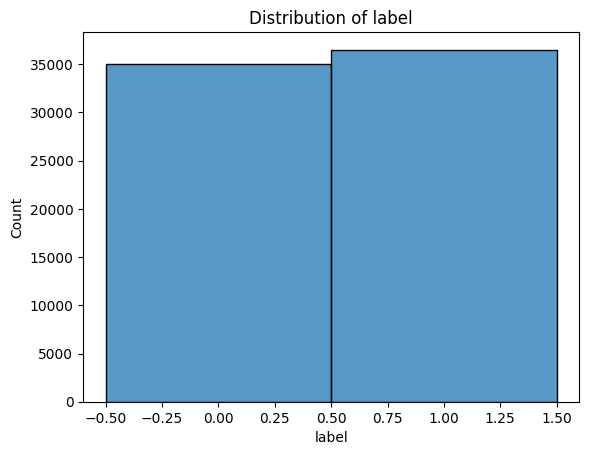

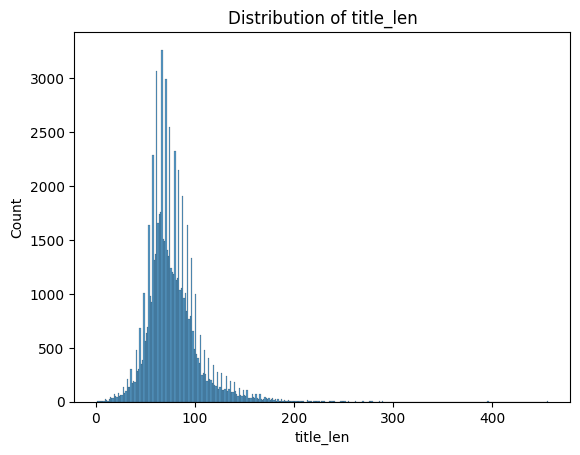

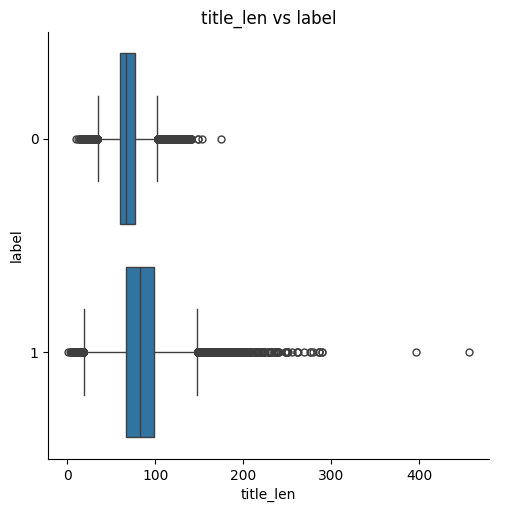

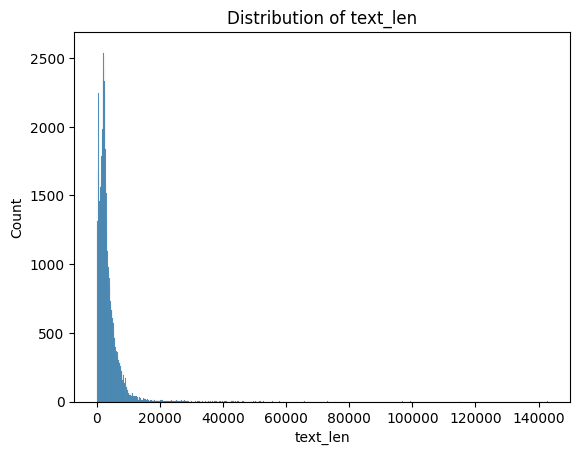

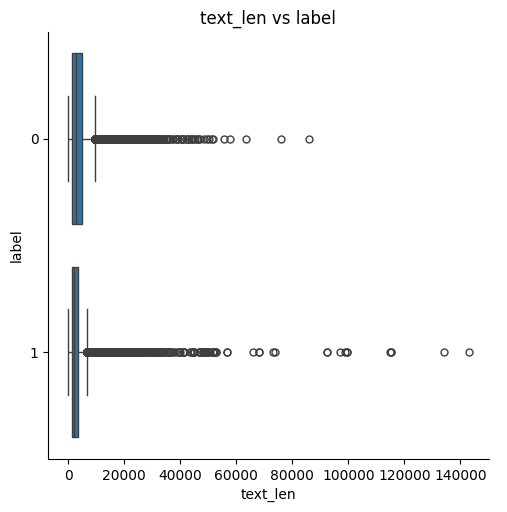

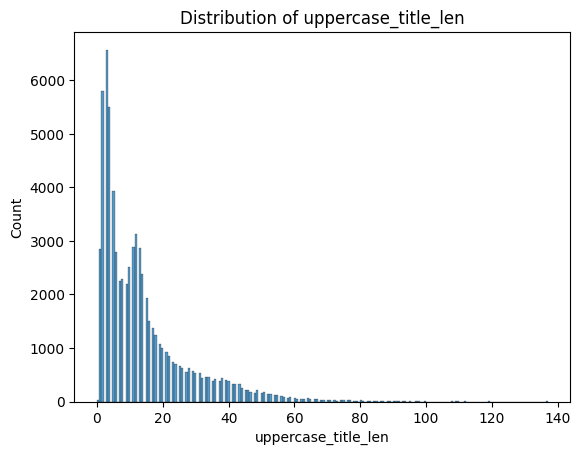

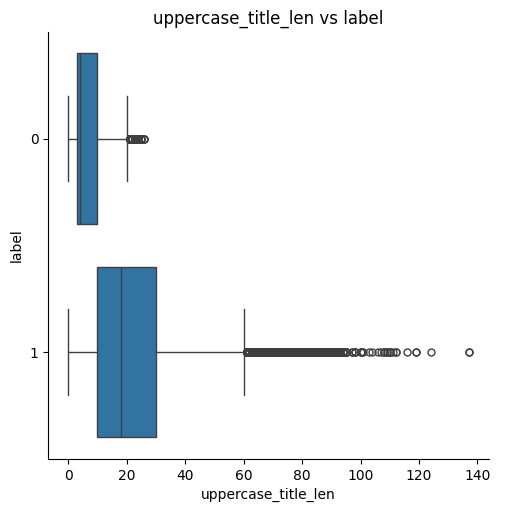

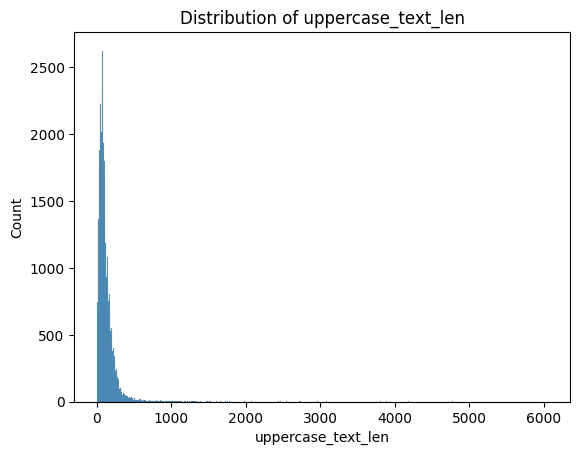

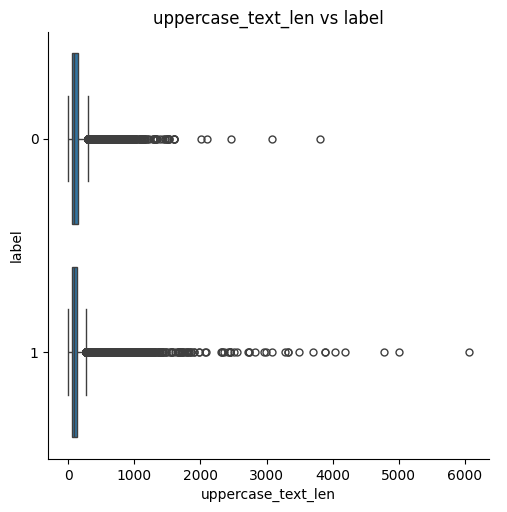

In [7]:
def make_plots():
    """ 
    Plot various columns in our dataset.
    """
    # make plots of the distribution of the new columns, and how they compare to our label
    for name in ["label", "title_len", "text_len", "uppercase_title_len", "uppercase_text_len"]:
        # make histogram to see distribution of column
        sns.histplot(with_len[name])
        plt.title(f"Distribution of {name}")
        plt.show()

        # only make a plot vs. label IF it's not the label column itself
        if name != "label":
            # make a boxplot to see how the column compares to the label
            sns.catplot(data=with_len, x=name, y="label", kind="box")
            plt.title(f"{name} vs label")
            plt.show()

make_plots()

Next we look into outliers in our dataset.

In [8]:
# get the indices of rows where the text length is greater than 60,000
too_long = with_len[with_len["text_len"] > 60000].index

# drop the rows with those indices
df.drop(too_long, inplace=True)
with_len.drop(too_long, inplace=True)

Since we cannot visually tell a correlation between length and fakeness and since there are 19 major outliers with > 60000 text_len, we will drop these articles.  

In [ ]:
# make plots again to see if there's a major difference
make_plots()

Below was commented out because it takes a lot of time to compile when I needed to run the entire notebook.

In [ ]:
# from sklearn.feature_extraction.text import CountVectorizer
# import seaborn as sns

# # convert titles into a Bag of Words matrix
# vectorizer = CountVectorizer()
# bow_matrix = vectorizer.fit_transform(df['title']).toarray()

# # create a DataFrame of BoW with labels
# bow_df = pd.DataFrame(bow_matrix, columns=vectorizer.get_feature_names_out())
# bow_df['label'] = df['label']

# # compute mean occurrence for True/False labels
# heatmap_data = bow_df.groupby('label').mean().T  # Transpose for words on rows

# # plot it 
# sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", cbar=True)
# plt.title("Heatmap of Words vs Labels")
# plt.xlabel("Label")
# plt.ylabel("Word")
# plt.show()

### ***Initial Observations to Plots***

Initially looking at these plots, the largest relation we identify is that uppercase_title_len seems to have a higher length for real news articles. We believe that this may be due to the fact that real news articles may have more formal titles, thus leading to an overall increase in the amount of capital letters used in the title. This could be names, towns and cities, or other proper nouns that are capitalized in the title.

Overall, looking at the heatmap we're not able to really get any kind of information from it. Although, Zach spent a decent amount of time getting this to work, so we decided to leave it in. 

Similarly, there's seems to be a similar relationship with title_len being longer for a real news articles. We believe this may be due to the fact that real news articles have more formal titles. A real news articles may require a more descriptive title to accurately describe the content of the article.

In [ ]:
# search titles and highlight words that correlate to true or false
def search(search_term, label, print_results=False):
    """ 
    Search titles for a search term and highlight words that correlate to true or false.

    Args:
        search_term (str): The term to search for.
        label (str): The label to search for.
        print_results (bool): Whether to print the results.
    """
    # get the indices of rows where the title contains the search term
    search_results = df[df["title"].str.contains(search_term, case=False)].index

    # get the indices of rows where the label matches the label we're looking for
    label_results = df[df["label"] == label].index

    # get the intersection of the two sets of indices
    common_indices = search_results.intersection(label_results)
    # # print the titles of the rows with those indices
    # if print_results:
    #     for index in common_indices:
    #         print(df.loc[index, "title"])

    # print length of common indices
    print(f'How many common terms we found for {search_term} being {label}: {len(common_indices)}\n')

# search for Trump in labels
search("Trump", 1)
search("Trump", 0)

# search for Biden in labels
search("Biden", 1)
search("Biden", 0)

# search for Fascist in labels
search("Fascist", 1)
search("Fascist", 0)

### ***Function to search titles for certain terms***

We created the search_terms function which searches our text files to see if a certain word is present. This function can be used to see if there's certain terms that are more likely to be present in true or fake news articles. 

Zach and Preston just had the idea to create this function, as he thought it's an interesting concept. Usability of it may be limited, but it's cool to see if there's any terms that are more likely to be present in fake news articles.

In [ ]:
# list of common terms to ignore searching for
ignore = [
    'of', 'the', 'The', 'a', 'is', 'in', 'to', 'and', 'on', 'for', 'by', 
    'with', 'as', 'from', 'at', 'this', 'an', 'or', 'it', 'that', 'was',
    'be', 'not', 'are', 'while', 'for', 'after', 'over', 'up', 'down', 's',
    'he', 'have', 'his', 'her', 'they', 'their', 'we', 'our', 'us', 'you',
    'has', 'had', 'will', 'would', 'should', 'could', 'can', 'do', 'did',
    '”', '—', '[Video]', '(Video)', '[VIDEO]', '(VIDEO)', '–', '-'
]


def count_terms(label, column):
    """ 
    Counts common terms in the corresponding label.

    Args:
        label (str): true or false label to search
    """
    # get the indices of rows where the label matches the label we're looking for
    label_results = df[df["label"] == label].index

    # get the text of the rows with those indices
    text = df.loc[label_results, column]

    # join the text into one big string
    text = " ".join(text)

    # split the text into words
    words = text.split()

    # count the frequency of each word
    word_counts = pd.Series(words).value_counts()

    # remove common terms from the word counts
    word_counts = word_counts.drop(ignore, errors='ignore')

    # print the 20 most common words
    print(f'Top 20 most common words in {label} {column}: \n{word_counts.head(20)}\n\n')

# count common terms in true/false text
count_terms(1, "text")
count_terms(0, "text")

# count common terms in true/false title
count_terms(1, "title")
count_terms(0, "title")

### ***Function to count common words***

Similarly to the last section of checking specified words, Zach also was curious about seeing what the most common words were across all articles. This could be useful for future analysis, as we could see if there's any words that are more likely to be present in fake news articles. We aren't able to find any explicitly noticeable trends, but again it's an interesting idea to see if there's any words that are more likely to be present in fake news articles.

This may be useful again in future analysis, as we can see exact words which tend to be more common.

In [ ]:
from spellchecker import SpellChecker
def num_typo(label) -> bool:
    """
    counts the number of typos in true or false titles.
    
    Args:
        label (str): true or false label to search
    
    Returns:
        bool: True if the title contains a typo, False otherwise.
    """
    spell = SpellChecker()

    # get the indices of rows where the label matches the label we're looking for
    label_results = df[df["label"] == label].index

    # get the text of the rows with those indices
    text = df.loc[label_results, "title"]

    # split words by a space
    words = " ".join(text).split()

    # find misspelled words
    misspelled = spell.unknown(words)

    # print amount of misspelled words
    print(f'Number of misspelled words in {label}: {len(misspelled)}\n')

# check if the title contains a typo
num_typo(1)
num_typo(0)

### ***Function to Count Typos***

Zach had the idea to create a function which counted typos or misspellings in the titles for the articles, assuming that false titles may contain more typos. Oddly enough, we found that real news articles had more typos in their titles. This could be due to the fact that real news articles may have more formal titles, which may lead to more typos. Names, places, or proper nouns may be more present and leading to this oddity. 

# ***Feature Selection and Model Training***

Due: 12/1/2024

Authors:
- Preston Knepper
- Zachary Eanes
- Kevin McCall

In this section of the assignment, we will be selecting features and training models to predict whether an article is fake or real. We will be engineering new features, similar to the text_len and title_len we used earlier, and then training our model to predict. 

---

We first train on just title, as when we tried to do both title and test we continually ran into memory issues and the kernel crashing.

In [ ]:
# import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import numpy as np

# predict the label based on title
X = with_len[['title']]
Y = with_len['label']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# convert titles into a Bag of Words matrix
vectorizer = TfidfVectorizer()
X_train_title = vectorizer.fit_transform(X_train['title']).toarray()
X_test_title = vectorizer.transform(X_test['title']).toarray()

# create a logistic regression model
model = LogisticRegression(max_iter=1000)

# fit the model to the training data
model.fit(X_train_title, y_train)

# make predictions
y_pred = model.predict(X_test_title)

# get statistics
print(classification_report(y_test, y_pred))


In [ ]:
# confusion matrix from sklearn
from sklearn.metrics import confusion_matrix    

# create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# plot confusion matrix
sns.heatmap(cm, annot=True, cmap="coolwarm", cbar=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Set custom tick labels
plt.xticks(ticks=[0.5, 1.5], labels=['False', 'True'])
plt.yticks(ticks=[0.5, 1.5], labels=['False', 'True'])

plt.show()


## ***Explaining our Choices***

### __Why Logistic Regression?__ 

We decided to use Logistic Regressions as our model because it's a simple model that can be used for binary classification. We also used the Logistic Regression model because it's easy to interpret and can be used to predict the probability of an article being fake or real. Overall Logistic Regression proved to be efficient for our uses and was able to create categorical predictions based on independent variables, such as title or the lengths we use later.

### __Bag of Words, Vectorizer, and TF-IDF?__

__Bag of Words__ is a common tool used to extract numerical data about text data, which is then used for machine learning models. What this does is it takes text and converts it into a matrix which counts the occurrences of words in the text.

__TF-IDF stands for Term Frequency-Inverse Document Frequency__, which differs as it gives higher weights to words that occur __less__ frequently. This can be more beneficial for this case, since the titles will contain a lot of common terms (and, of, the), so we specifically want more weight given to unique terms in our titles and text. This is why we chose specifically TF-IDF over a general Bag of Words. 

Along with this, TF-IDF is considered a variation of Bag of Words that is generally better for text data. 

---

## ***Interpreting our Results***

### ***We break down each of the results as follows:***

#### __Confusion Matrix__: 6778 True Positives, 675 False Positives, 6279 True Negatives, 572 False Negatives

This is a handy visualization of how our model performed. Overall, we're able to observe it did very well, with getting over 13,000 correct predictions and only 1247 incorrect predictions. This is a very good sign for our model.

#### __Precision__: 0.90 for true, 0.92 for false

Precision measures the accuracy of positive predictions. It's the ratio of true positives (correctly predicted positives) to the sum of true positives and false positives (incorrectly predicted positives). In this case, our model has a precision of 0.90 for true and 0.92 for false. This means that our model is able to accurately predict whether an article is fake or real.

#### __Recall__: 0.92 for true, 0.90 for false

Recall measures the ability of the model to find all the relevant cases within a dataset. It's the ratio of true positives to the sum of true positives and false negatives (missed positives). In this case, our model has a recall of 0.92 for true and 0.90 for false. This means that our model is able to accurately predict whether an article is fake or real.

#### __F1 Score__: 0.91 for true, 0.91 for false

F1 score gives us a weighted average of the precision and recall, which can give us a balanced understanding of both of the metrics. In this case, our model has an F1 score of 0.91 for true and 0.91 for false. This means that our model is able to accurately predict whether an article is fake or real.

---

Overall, we can see that our model is able to accurately predict whether an article is fake or real. This is due to the fact that our model has a high precision, recall, and F1 score for both true and false articles. 

## __Other approaches similar to the one above:__

In [ ]:
# # Define predictors and target
# X = with_len[['text']]
# Y = with_len['label']

# # Split the data
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# # TF-IDF vectorization for text features
# vectorizer = TfidfVectorizer()

# X_train_text = vectorizer.fit_transform(X_train['text']).toarray()
# X_test_text = vectorizer.transform(X_test['text']).toarray()

# # Logistic regression model
# model = LogisticRegression(max_iter=1000)
# model.fit(X_train_text, y_train)

# # Make predictions
# y_pred = model.predict(X_test_text)

# # Evaluate performance
# print(classification_report(y_test, y_pred))

Whenever we try to run it with text, we run into memory issues so unfortunately we're unable to run it and see if it would perform better than just using the title. This is probably due to the text being a field with a large amount of characters, which would require a lot of memory to process and just seems unrealistic to run on our local machines. We decided to leave it though as it's a good idea to test against title, we just aren't able to process it.

---

### Now we're gonna try training with only the parameters we engineered.

In [ ]:
# predict the label based on title_len, text_len, uppercase_title_len, uppercase_text_len
X = with_len[['title_len', 'text_len', 'uppercase_title_len', 'uppercase_text_len']]
Y = with_len['label']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# create a logistic regression model
model = LogisticRegression(max_iter=1000)

# fit the model to the training data
model.fit(X_train, y_train)

# make predictions
y_pred = model.predict(X_test)

# get statistics
print(classification_report(y_test, y_pred))

In [ ]:
# confusion matrix from sklearn
from sklearn.metrics import confusion_matrix    

# create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# plot confusion matrix
sns.heatmap(cm, annot=True, cmap="coolwarm", cbar=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Set custom tick labels
plt.xticks(ticks=[0.5, 1.5], labels=['False', 'True'])
plt.yticks(ticks=[0.5, 1.5], labels=['False', 'True'])

plt.show()

## ***Interpreting our Results***

This model has almost double the amount of false positives and negatives as
compared to the other models. However, considering this model uses no text data
to determine this result, this is very impressive.

Across the board, the accuracy, precision, recall, and f1 score has decreased
around 10%. This means that the model is using the classification data in the
inverse document frequency is helping to make more accurate predictions

#### __Confusion Matrix__: 5807 True Positives, 1147 False Positives, 5655 True Negatives, 1695 False Negatives

#### __Precision__: 0.83 for true, 0.77 for false

Precision measures the accuracy of positive predictions. It's the ratio of true positives (correctly predicted positives) to the sum of true positives and false positives (incorrectly predicted positives). With a precision of 0.83 of true and 0.77 for false, this means that our model is fairly precise in predicting whether an article is fake or real.

#### __Recall__: 0.77 for true, 0.84 for false

Recall measures the ability of the model to find all the relevant cases within a dataset. It's the ratio of true positives to the sum of true positives and false negatives (missed positives). With a recall of 0.77 for true and 0.84 for false, this means that our model is able to accurately predict whether an article is fake or real.

#### __F1 Score__: 0.80 for true, 0.80 for false

F1 score gives us a weighted average of the precision and recall, which can give us a balanced understanding of both of the metrics. With an F1 score of 0.80 for true and 0.80 for false, this means that our model has a good balance between the precision and recall.

#### __Accuracy__: 0.80

Overall our accuracy is 0.80, meaning that our model based on purely numerical and engineer features is shockingly efficient. This is a good model in general, and leads us to believe we made good features that were able to explain and describe our dataset well.

### __NOTE:__ The next block can take a while to run, in Zach's 2020 MacBook Air (M1 chip, 8gb ram) it took almost 2 hours. 

In [ ]:
# combination of title and our engineered features 
X = with_len[['title', 'title_len', 'text_len', 'uppercase_title_len', 'uppercase_text_len']]
Y = with_len['label']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# convert titles into a Bag of Words matrix
vectorizer = TfidfVectorizer()
X_train_title = vectorizer.fit_transform(X_train['title']).toarray()
X_test_title = vectorizer.transform(X_test['title']).toarray()

# combine the BoW matrix with the other features
X_train = np.concatenate([X_train_title, X_train.drop(columns=['title'])], axis=1)
X_test = np.concatenate([X_test_title, X_test.drop(columns=['title'])], axis=1)

# create a logistic regression model
model = LogisticRegression(max_iter=1000)

# fit the model to the training data
model.fit(X_train, y_train)

# make predictions
y_pred = model.predict(X_test)

# get statistics
print(classification_report(y_test, y_pred))

In [ ]:
# create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# plot confusion matrix
sns.heatmap(cm, annot=True, cmap="coolwarm", cbar=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Set custom tick labels
plt.xticks(ticks=[0.5, 1.5], labels=['False', 'True'])
plt.yticks(ticks=[0.5, 1.5], labels=['False', 'True'])

plt.show()

### ***We break down each of the results as follows:***

#### __Confusion Matrix__: 6745 True Positives, 375 False Positives, 6579 True Negatives, 605 False Negatives

This is a handy visualization of how our model performed. Overall, we're able to observe it did very well, with getting over 13,000 correct predictions and only 1080 incorrect predictions. This is a very good sign for our model, and the results that follow are even more of a support to a strong model.

#### __Precision__: 0.95 for true, 0.92 for false

Precision measures the accuracy of positive predictions. It's the ratio of true positives (correctly predicted positives) to the sum of true positives and false positives (incorrectly predicted positives). In this case, our model has a precision of 0.95 for true and 0.92 for false. Our model is extremely precise in predicting whether an article is fake or real.

#### __Recall__: 0.92 for true, 0.95 for false

Recall measures the ability of the model to find all the relevant cases within a dataset. It's the ratio of true positives to the sum of true positives and false negatives (missed positives). In this case, our model has a recall of 0.92 for true and 0.95 for false. This means that our model has an extremely strong recall.

#### __F1 Score__: 0.93 for true, 0.93 for false

F1 score gives us a weighted average of the precision and recall, which can give us a balanced understanding of both of the metrics. In this case, our model has an F1 score of 0.93 for true and 0.93 for false. This means that our model has an excellent balance between the precision and recall.

This is our __most accurate__ model yet by a decent margin, and it's a comfortable mix of our engineered features and the titles. This is an incredible result for our model, and we're thrilled with the results.

## ***LLM Approach*** 

We will now try to use a pre-trained, textual AI model to see if it produces accurate results. 

For this, we will be using Llama3.2 due to the fact that it is a free model. We will do this through the ollama library which uses llama_cpp found at https://github.com/ggerganov/llama.cpp. Due to the power and time required for the operation, the predictions were performed by writing to an external file.

You can also download Llama from https://ollama.com/ and run `ollama pull llama3.2`.

In [ ]:
from ollama import chat
from ollama import ChatResponse
import pandas as pd
from typing import Mapping, Sequence

prompt = """
You are a binary fact-checking AI specifically designed to classify news articles as True or False based on factual accuracy. 

Rules:
1. Respond ONLY with "True" or "False"
2. Do not explain, elaborate, or add any additional text
3. Evaluate the entire article (title and body text) for factual veracity
4. Consider multiple credibility factors:
  - Source reliability
  - Cross-referenced information
  - Verifiable claims
  - Potential misinformation markers
5. Base your determination on whether the core claims in the article are factually supported
6. If multiple claims exist, determine overall article truthfulness
7. Err on the side of skepticism when evidence is ambiguous

Focus solely on factual accuracy, not opinion or interpretation. Your goal is to
identify whether the article presents true or false information.

TITLE: {}

TEXT: {}
"""
# df = pd.read_csv("WELFake_Dataset.csv")
titles: list[str] = df["title"].to_list()
texts: list[str] = df["text"].to_list()
length = len(titles)

The following cell took 4 hours to run on RTX 3070, Ryzen 7 5800. Additionally,
it was segmented into multiple runs because of optimizations that needed to be
made. It is commented out so it is not accidentally ran

In [ ]:
# START = 26324

# with open("pred.csv", "a", encoding="utf-8") as file:
#   # file.write("id, label\n")
#   for i in range(START, length):
#     if len(str(texts[i])) > 7573:
#       continue
#     response: ChatResponse = chat(model='llama3.2', messages=[
#       {
#         'role': 'user',
#         'content': prompt.format(titles[i], texts[i])
#       }
#     ])
#     if response["message"]["content"].lower().strip() not in ["true", "false"]:
#       print(f"skipping {i}")
#       continue
      
#     print(f'{i}/{length}', end="\n")
#     file.write(f'{i}, {response["message"]["content"]}\n')

Here I saved the output and tried to find a pattern between what causes some to
compute fast and other to not. I concluded that text length was the biggest
factor, as if the article's text is too long, the input would fall outside of a
LLM's context window, and they won't read the instructions. Additionally,
performing copies on texts with thousands of characters is expensive. 

In [ ]:
# with open("successes.txt", "r", encoding='utf-8') as f:
#     too_long = [int(line[9:].strip()) for line in f if line.startswith("skipping ")]

I decided on 7573 as cutoff point, as when I plotted the texts that failed, it
landed in the 10th percentile of text lengths. By removing these entries from
our dataset, we lose 2719 fake news samples and 2387 real news samples. This
could cause a bias.


In [ ]:
with_len[with_len["text_len"] > 7573.0].size

In [ ]:
with_len.loc[with_len["text_len"] > 7573.0, "label"].value_counts()

Here is the data being loaded in from disk after completing the run. It is a new
CSV that contains the article_id and the prediction that llama3.2 made.

In [ ]:
llamamama = pd.read_csv("pred.csv", names=["daindex", "llama_label"], header=0)
llamamama.set_index("daindex", inplace=True)

In [ ]:
llamamama

There is a huge discrepency of the data calculated by llama. It guessed that
the news articles were fake 61549 of the time and real 5831 of the time.

In [ ]:
for column in llamamama.columns:
    display(llamamama[column].value_counts().sort_values(ascending=False))

Perform an inner join to compare the guesses to the real results

In [ ]:
comparison_time = llamamama.join(with_len, how="inner")
comparison_time["llama_label"] = comparison_time["llama_label"].str.lower().str.strip().apply(lambda x: x == 'true').astype(np.int64)
comparison_time

Actual accuracy is __41.6415876865951%__ as calculated in the following cell

In [ ]:
acc = (comparison_time["llama_label"] == comparison_time["label"]).sum() / comparison_time.shape[0]
print(f"Calculated Accuracy of using Llama: {acc}")

### Here is a confusion matrix for the model, as well as precision, recall, and F1:

In [ ]:
# values used for summations
true_positive = 0
true_negative = 0
false_positive = 0
false_negative = 0

# predicted values for the label
predicted = comparison_time["llama_label"].to_list()

# actual values for the label
actual = comparison_time["label"].to_list()

# sum our value for the confusion matrix
for i, label in enumerate(predicted):
    if label == actual[i] and label == True:
        true_positive += 1
    if label == actual[i] and label == False:
        true_negative += 1
    if label != actual[i] and label == True:
        false_positive += 1
    if label != actual[i] and label == False:
        false_negative += 1

print("       Confusion Matrix")
print("       True       False")
print("      -----------------")
print(f"True  | {true_positive}   | {false_positive}  |")
print("      |-------|-------|")
print(f"False | {false_negative} | {true_negative} |")
print("      -----------------\n")

# calculate precision, recall, and F1 score
true_precision = true_positive / (true_positive + false_positive)
false_precision = true_negative / (true_negative + false_negative)
true_recall = true_positive / (true_positive + false_negative)
false_recall = true_negative / (true_negative + false_positive)

print("Precision for true values:", true_precision)
print("Precision for false values:", false_precision)
print("Recall for true values:", true_recall)
print("Recall for false values:", false_recall)
print("F1 Score for true values:", 2*true_precision*true_recall/(true_recall + true_precision))
print("F1 Score for false values:", 2*false_precision*false_recall/(false_recall + false_precision))


##### As stated before, the model primarily chose false and with low accuracy. In fact, the model had more incorrect more often when it chose false than correct. Let's analyze the confusion matrix, precision, recall, and F1 score of the model:

#### __Confusion Matrix:__ 550 True Positives, 5281 False Positive, 33696 False Negatives, 27262 True Negatives

The confusion matrix reveals the poor nature behind the Llama model. Firstly, we only correctly predicted 27812 titles out of the entire dataset. Most of these positives also come due to the bias behind selecting False a lot more often than True. Along with this, we have a large number of False Negatives and False Positives. In general, this means that the model was not able to accurately predict whether an article was fake or real.

#### __Precision:__ 0.09 for True and 0.45 for False

Precision is a measure of the accuracy of the model's positive predictions. In this case, the precision of Llama was extremely imprecise. This means that the model was not able to accurately predict whether an article was fake or real.

#### __Recall:__ 0.02 for True and 0.84 for False

Recall is a measure of the model's ability to find all the relevant cases within a dataset. In this case, Llama had poor recall for true values but relatively good recall for False values. Oddly, we get a fairly high recall value for False, but this is likely due to the fact that the model primarily chose False.

#### __F1 Score:__ 0.03 for True and 0.58 for False

F1 Score is a weighted average of the precision and recall. In this case, the F1 Score proves that Llama made an extremely poor prediction model. It has a decent F1 value for False, but again this is due to the models bias towards False.

## ***DistilBERT Binary Classifier***

We will implement a binary classifier to determine data is fake based on the
title and article contnent. We will follow along with [this official hugging
face
resource](https://colab.research.google.com/github/peterbayerle/huggingface_notebook/blob/main/distilbert_tf.ipynb)
to guide us, and try to match the scenario to our use case and improve the model.

In [12]:
# install needed packages
%pip install tensorflow transformers
%pip install tf-keras

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached tf_keras-2.18.0-py3-none-any.whl (1.7 MB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
# import necessary libraries
import tensorflow as tf
from tensorflow.keras import activations, optimizers, losses
from transformers import DistilBertTokenizer, TFDistilBertForSequenceClassification
import pickle

The following cells train the model. You can skip ahead and load the pretrained
model that is saved to disk (in model/fake_news_clf/).
This can be used to test the model without retraining it each time. This is
loaded using HuggingFace's 🤗Transformers library.

In [26]:
# load model and make dataset
X = df["text"]
y = df["label"]
MODEL_PATH = "./model/fake_news_clf"
MODEL_INFO_PATH = "./model/info.pkl"

We will have to truncate the text to fit within distilBERT's context window.
Therefore, I want to take a look at the data that we are going to use. I will
look at around the first 384 tokens assuming each word is 5 letters long.

In [27]:
import textwrap

# wrap text to 80 chars for readability
for article_text in df["text"].apply(lambda x: x[:384 * 5])[:5]:
    print('\n'.join(textwrap.wrap(article_text, width=80)), end="END\n\n\n")

No comment is expected from Barack Obama Members of the #FYF911 or #FukYoFlag
and #BlackLivesMatter movements called for the lynching and hanging of white
people and cops. They encouraged others on a radio show Tuesday night to  turn
the tide  and kill white people and cops to send a message about the killing of
black people in America.One of the F***YoFlag organizers is called  Sunshine.
She has a radio blog show hosted from Texas called,  Sunshine s F***ing Opinion
Radio Show. A snapshot of her #FYF911 @LOLatWhiteFear Twitter page at 9:53 p.m.
shows that she was urging supporters to  Call now!! #fyf911 tonight we continue
to dismantle the illusion of white Below is a SNAPSHOT Twitter Radio Call Invite
#FYF911The radio show aired at 10:00 p.m. eastern standard time.During the show,
callers clearly call for  lynching  and  killing  of white people.A 2:39 minute
clip from the radio show can be heard here. It was provided to Breitbart Texas
by someone who would like to be referred to as 

In [28]:
MODEL_NAME = 'distilbert-base-uncased'
# DistilBERT maximum token limit
MAX_LEN = 384


review = X[0]

# load the tokenizer
tkzr = DistilBertTokenizer.from_pretrained(MODEL_NAME)

# encode the review
inputs = tkzr(review, max_length=MAX_LEN, truncation=True, padding=True)

# print the review and the encoded inputs
print(f'review: \'{review}\'')
print(f'input ids: {inputs["input_ids"]}')
print(f'attention mask: {inputs["attention_mask"]}')


review: 'No comment is expected from Barack Obama Members of the #FYF911 or #FukYoFlag and #BlackLivesMatter movements called for the lynching and hanging of white people and cops. They encouraged others on a radio show Tuesday night to  turn the tide  and kill white people and cops to send a message about the killing of black people in America.One of the F***YoFlag organizers is called  Sunshine.  She has a radio blog show hosted from Texas called,  Sunshine s F***ing Opinion Radio Show. A snapshot of her #FYF911 @LOLatWhiteFear Twitter page at 9:53 p.m. shows that she was urging supporters to  Call now!! #fyf911 tonight we continue to dismantle the illusion of white Below is a SNAPSHOT Twitter Radio Call Invite   #FYF911The radio show aired at 10:00 p.m. eastern standard time.During the show, callers clearly call for  lynching  and  killing  of white people.A 2:39 minute clip from the radio show can be heard here. It was provided to Breitbart Texas by someone who would like to be ref

In [29]:
# encode all the reviews
encodings = tkzr(list(X), max_length=MAX_LEN, truncation=True, padding=True)

In [30]:
# get our dataset
tfdataset = tf.data.Dataset.from_tensor_slices((dict(encodings), y))

In [31]:
TEST_SPLIT = 0.2
BATCH_SIZE = 2

train_size = int(len(X) * (1-TEST_SPLIT))

# split the dataset into training and testing sets
tfdataset = tfdataset.shuffle(len(X))
tfdataset_train = tfdataset.take(train_size)
tfdataset_test = tfdataset.skip(train_size)

tfdataset_train = tfdataset_train.batch(BATCH_SIZE)
tfdataset_test = tfdataset_test.batch(BATCH_SIZE)

In [32]:
N_EPOCHS = 2
LEARNING_RATE=3e-5

# load the model, find losses, compile
model = TFDistilBertForSequenceClassification.from_pretrained(MODEL_NAME)
loss = losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer="adam", loss=loss, metrics=['accuracy'])

# fit the model
model.fit(tfdataset_train, batch_size=BATCH_SIZE, epochs=N_EPOCHS)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['vocab_layer_norm.weight', 'vocab_projector.bias', 'vocab_layer_norm.bias', 'vocab_transform.bias', 'vocab_transform.weight']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFDistilBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']
You should 


Epoch 1/2


28607/28607 [==============================] - 23402s 818ms/step - loss: 0.6959 - accuracy: 0.5067
Epoch 2/2
28607/28607 [==============================] - 23652s 827ms/step - loss: 0.6935 - accuracy: 0.5043


In [33]:
# evaluate how model did
benchmarks = model.evaluate(tfdataset_test, return_dict=True, batch_size=BATCH_SIZE)
print(benchmarks)

7152/7152 [==============================] - 1012s 141ms/step - loss: 0.6931 - accuracy: 0.5084
{'loss': 0.6930795311927795, 'accuracy': 0.5083892345428467}


In [ ]:
# save the model and model info
model.save_pretrained(MODEL_PATH)
with open(MODEL_INFO_PATH, 'wb') as f:
    pickle.dump((MODEL_NAME, MAX_LEN), f)

In [35]:
# Method for predicting - used later on
def create_predictor(model, model_name, max_len):
    """A factory function for creating predictions using the given model.

    Args:
        model (_type_): The model used for predictions
        model_name (_type_): The name of the model
        max_len (_type_): The maximum token length of the model

    Returns:
        
    """
    tkzr = DistilBertTokenizer.from_pretrained(model_name)
    def predict_proba(text):
        x = [text]

        encodings = tkzr(x, max_len=max_len, truncation=True, padding=True)
        tfdataset = tf.data.Dataset.from_tensor_slices(dict(encodings))
        tfdataset = tfdataset.batch(1)

        preds = model.predict(tfdataset).logits
        preds = activations.softmax(tf.convert_to_tensor(preds)).numpy()
        return preds[0][0]
    
    return predict_proba

In [36]:
# make predictor 
fake_news_clf = create_predictor(model, MODEL_NAME, MAX_LEN)
fake_news_clf(X[0])

Keyword arguments {'max_len': 384} not recognized.


1/1 [==============================] - 1s 995ms/step


np.float32(0.48509187)

In [ ]:
with open(MODEL_INFO_PATH, "rb") as f:
    model_name, max_len = pickle.load(f)
loaded_model = TFDistilBertForSequenceClassification.from_pretrained(MODEL_PATH)

fake_news_clf = create_predictor(loaded_model, model_name, max_len)

fake_news_clf(X[0])

# ***Part III: Challenges to Overcome***

Due: 12/8/2024

Authors:
- Preston Knepper
- Zachary Eanes
- Kevin McCall

In this section of the assignment, we will be discussing the challenges we faced while working on our project. This includes challenges with data preprocessing, model training, and other aspects of the project.

---

## ***EDA Challenges***

One of the main challenges we faced during data preprocessing and handling was __engineering more features to create a robust dataset to train on__. Using just the titles or text didn't feel like enough to us, so we want to engineer more features. The entire dataset had plenty of rows for us to train on, but the lack of columns which explained the fake/true news articles just seemed lacking. This was a challenge __we overcame by engineering the features dealing with the lengths of titles and text__, and had to get extra creative by counting __specifically uppercase letters__. We found it difficult in general to find features that would be useful for our model, but we were able to overcome this challenge by thinking outside the box. We also we able to address this by exploring other ideas before considering if we should add them to the dataset. This includes trying to find common terms throughout the text, seeing the typos present, and counting the number of occurrences of words in all of the texts or titles.

Another issue we faced during EDA was __effectively visualizing our dataset through plots__. We found it difficult to create plots which were both informative and simple to read, as we had a large dataset with few columns. With the columns that were present before feature engineering, it was practically impossible to plot what was present effectively. We had no information that was categorical or numerical, so we were forced to rely on engineered features to create plots. After creating features dealing with the lengths of many different aspects of the texts and titles, we were able to then create plots which revealed some trends (such as title length being longer for true news articles). This was a challenge we __overcame by engineering more features and then creating plots based on these features__.

## ***Model Training Challenges***

The most present challenge we encountered during training was __computational limits when trying to use text to train__. This is actually an issue we weren't able to specifically overcome, even after trying it on machines with powerful graphics cards and high amounts of RAM. We found that the text was too large to process and would cause the kernel to crash. This was a challenge we were unable to overcome, and we had to resort to training on just the titles. We were also able to just train on the engineered features and found surprising results, especially since we were able to get good accuracy without any text or original information from the dataset. 

Another challenge we encountered, but couldn't really do anything about, was __model training time__. If we wanted to retrain a model with different parameters or features, it would take a long time to train. This was a challenge we were "able" to overcome simply by using more powerful machines, such as Kevin's desktop, which has a RTX 3070 GPU to improve training times. It was a challenge different from many others, but one we encountered. 

Lastly, we had issues with __training based on text in general__. Our text fields (text and title) are fields with a lot of characters, but they're not categorical or numerical data. This made it difficult to train on, as we either had to engineer new features which we numerical, or use a Bag of Words to get numerical information from the text itself. We found the Bag of Words matrix highly effective, and Zach was able to find resources about it after researching about this specific issue. However, using the Bag of Words This was a challenge we __overcame by using the Bag of Words matrix__ to train on the text fields.